# Understand how Dynamic Time Warping (DTW) works step by step

Dynamic Time Warping(DTW) is a famous and power tool to measure the distance and similarity between time series. Taking two short time sequances as examples , we will explain how DTW works time step by time step.

## 1.Introduction

First been proposed for automatic speech recognition [1],  DTW has also been applied for online signature recognition, Financial, indusrial sensor signals, Electrocardiogram (ECG) to measure the similarity between time series and do clustering tasks.

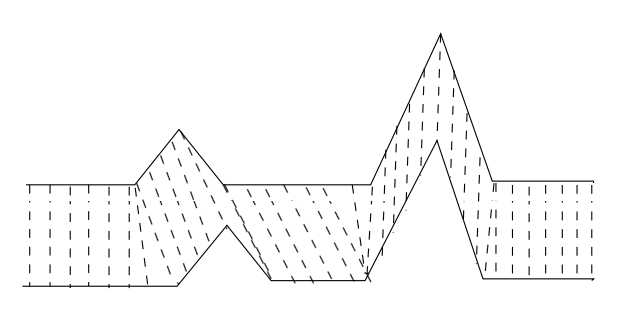

In [26]:
# This image comes from [4]
display.Image("DTW_pic.png") 


As an earliest similarity measures for time series proposed in the literature[2], DTW is still powerful.  
Authors in this paper  conducted an extensive experimental study remplementing 8 different time series representations and 9 similarity measures and their variants, and testing their effectiveness on 38 time series data sets from a wide variety of application domains. The experimental results show that '' on average, the constrained DTW is no worse than the
more recently introduced similarity measures in terms of accuracy across a wide range
of problems''.

Compared to Euclidean distance, advantages of DTW also include: 

1. DTW allows measure distances between sequences of different length.

2. DTW can aligne two sequences with time shift. In terms of clustering shifted time series,  a beautiful illustration can be find in this post [3] to show the advantage of DTW compared to Euclidean distance.

The pseudo-code of DTW [4]: 

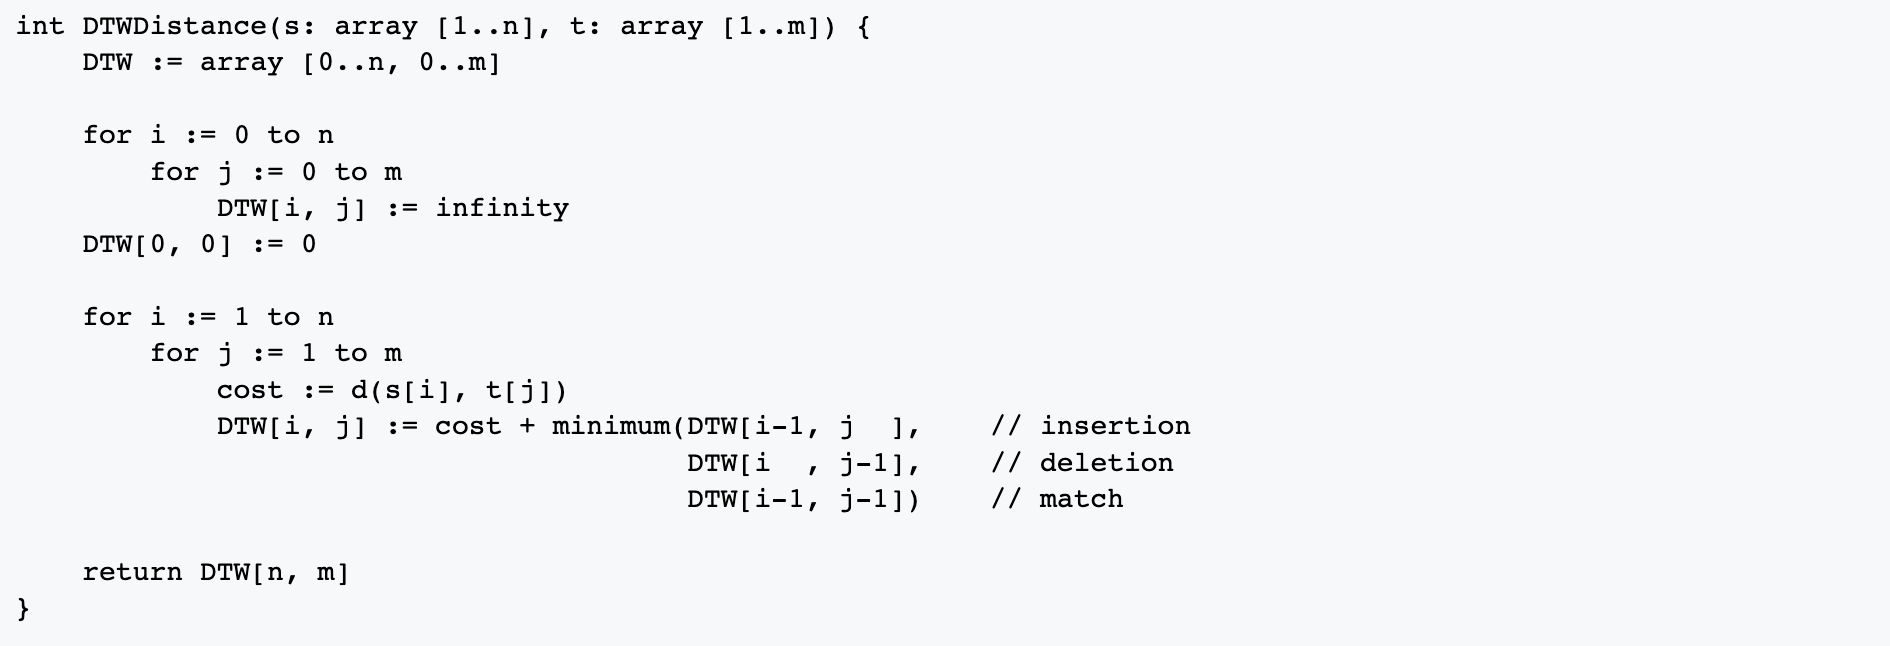

In [27]:
display.Image("DTW-algorithm.png")


We can see from the pseudo-code that:

1. In the first step, DTW initialze a $m+1 \times n+1$ matrix of infinity. 
    
    NOTE 1: Initializing DTW matrix elements as infinities, we can use the formula  $min([DTW[i-1,j],DTW[i,j-1],DTW[i-1,j-1] ])$ without adding extra coding lines for i =1 or/and j=1 , as these infiinitie elements are eliminated when calculating minimum when i =1 or/and j =1. 

    NOTE 2: Initializing DTW matrix elements as a  $m+1 \times n$ matrix rather than  $m+1 \times n$ matrix and begining the loops with i=1 and j=1,  $min([DTW[i-1,j],DTW[i,j-1],DTW[i-1,j-1] ])$ always make sense. And we dont need to code extra lines for i =1 or/and j=1. 

2. Then in for loop, DTW first calculates the point-to-point distance . Then DTW is calculated in a greedy way: it takes the minimum beween $DTW[i-1,j],DTW[i,j-1],DTW[i-1,j-1] $ and added it with the distance between point $i$ and $j$. 

    NOTE:  $DTW[i,j]$ is the optimal solution up to $i$ and $j$ -> it is the DTW distance between $Sequence1[:i]$ and $Sequence2[:j]$


Still not trivial to understand how it works, lets  decompose it step by step:

Here is the python implemention of DTW:

In [28]:
import numpy as np

def DynamicTimeWarping(sequence_1,sequence_2):
    
    m = len(sequence_1)
    n = len(sequence_2)

    DTW = np.matrix(np.ones((m+1,n+1)) * np.inf)
    DTW[0,0]=0
    
    for i in range(1,m+1):
        for j in range(1,n+1):
            distance = np.abs(sequence_1[i-1]-sequence_2[j-1])
            DTW[i,j] =  distance + np.min([DTW[i-1,j],DTW[i,j-1],DTW[i-1,j-1] ])

    return DTW[m,n]

Here we take two simple time sequences as example:

In [29]:
sequence_1 = [2,4]
sequence_2 = [1,3,2]

STEP 0. Initialization

We first iniitialize DTW matrix (line XXX and XXX)

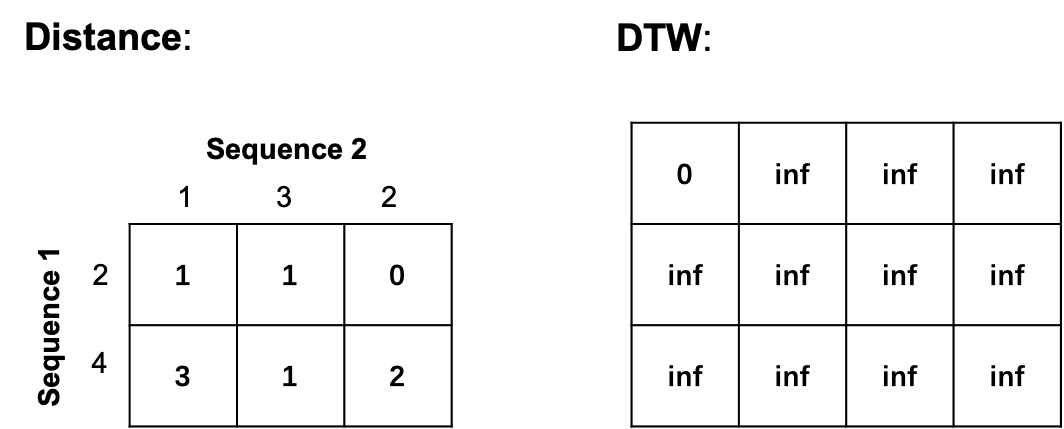

In [30]:
from IPython import display
display.Image("0.png")

STEP 1: $i = 1, j = 1$

At left side we have the  Distance matrix, it contains the absolute difference between  $Sequence_1[i-1]$ and $Sequence_1[j-1]$. 

At right side we have the DTW matrix, the grey area shows $([DTW[i-1,j],DTW[i,j-1],DTW[i-1,j-1] ])$. The green number is the calculated DTW[i,j] and it is obtained by adding the absolute difference between  $Sequence_1[i-1]$/ $Sequence_1[j-1]$ and minimum of  $([DTW[i-1,j],DTW[i,j-1],DTW[i-1,j-1] ])$ [highlighted in blue color].



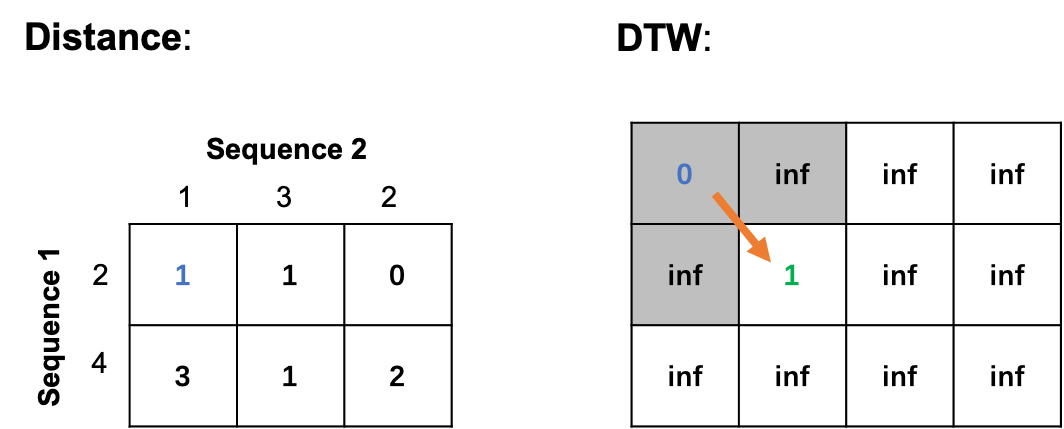

In [31]:
display.Image("1.png")

STEP 2: $i = 1, j = 2$

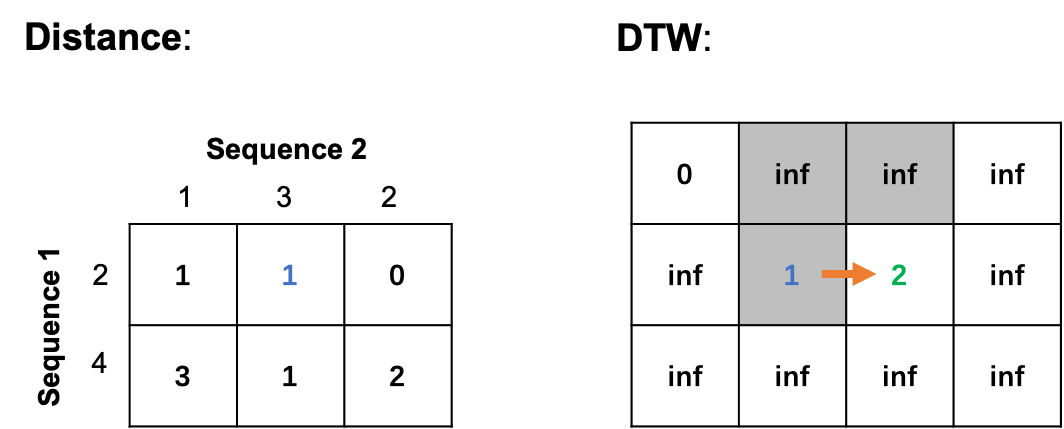

In [32]:
display.Image("2.png")

STEP 3: $i = 1, j = 3$

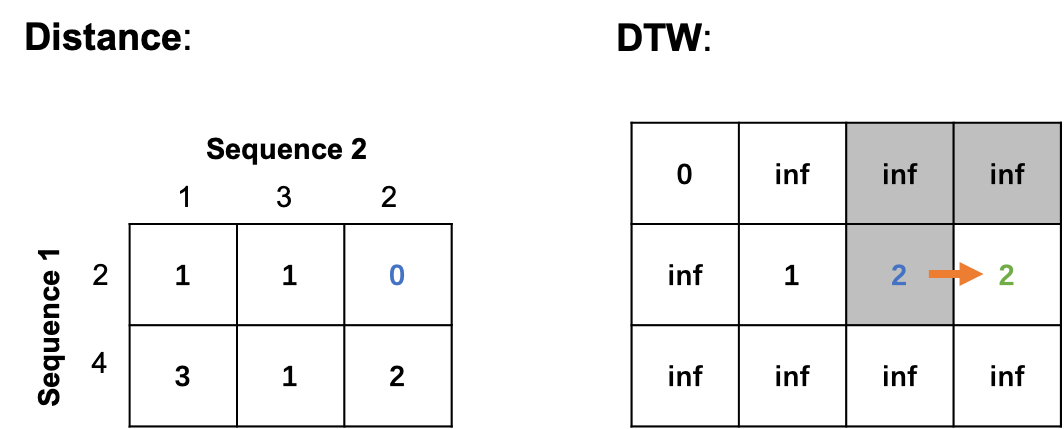

In [33]:
display.Image("3.png")

STEP 4: $i = 2, j = 1$

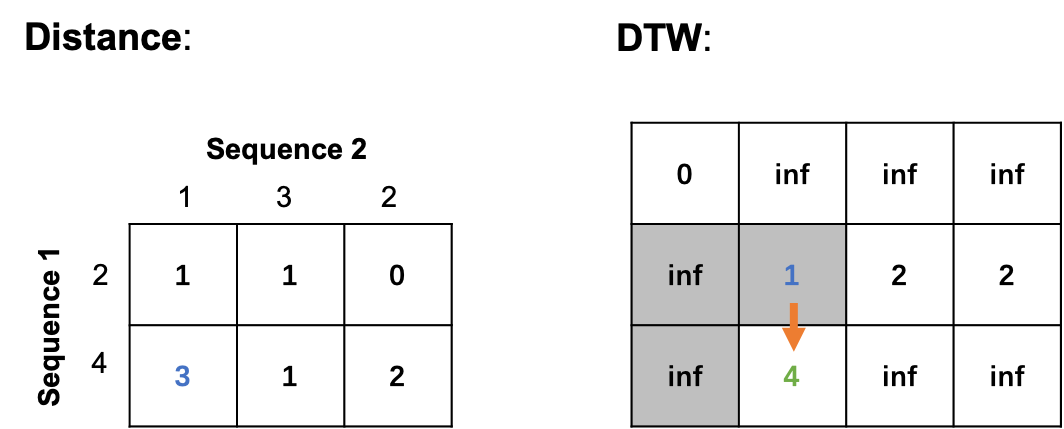

In [34]:
display.Image("4.png")

STEP 5: $i = 2, j = 2$

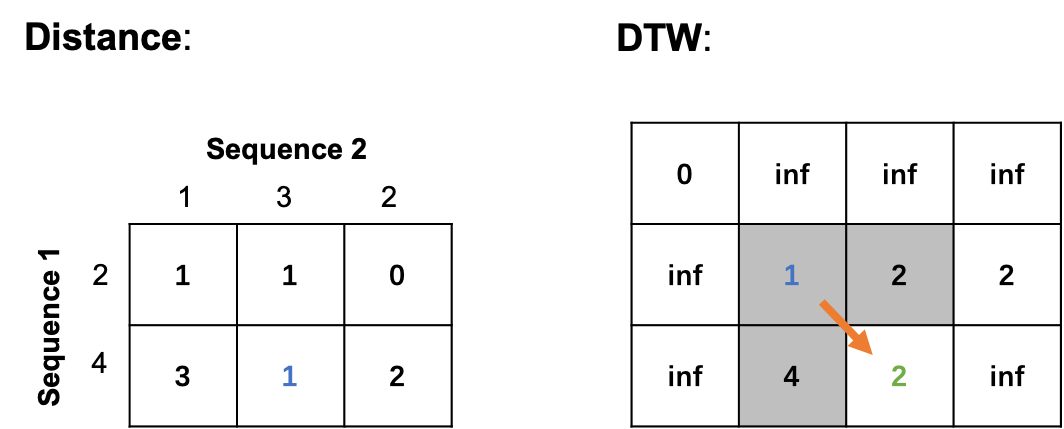

In [35]:
display.Image("5.png")

STEP 6: $i = 2, j = 3$

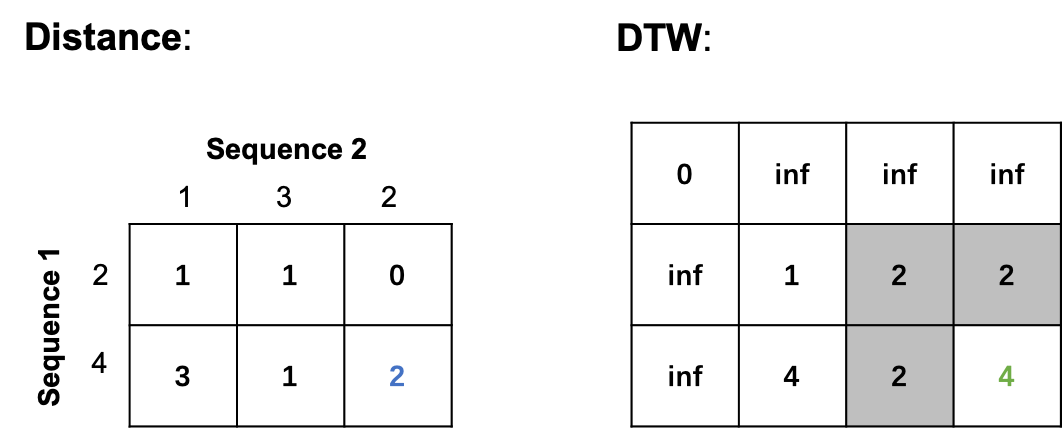

In [23]:
display.Image("6.png")

Hope this blog can help you better understand DTW ;)

Reference:

[1] Sakoe, Hiroaki, and Seibi Chiba. "Dynamic programming algorithm optimization for spoken word recognition." IEEE transactions on acoustics, speech, and signal processing 26.1 (1978): 43-49.

[2] Wang, Xiaoyue, et al. "Experimental comparison of representation methods and distance measures for time series data." Data Mining and Knowledge Discovery 26 (2013): 275-309.

[3] https://rtavenar.github.io/blog/dtw.html#ref-vintsyuk1968speech

[4] https://en.wikipedia.org/wiki/Dynamic_time_warping

Thank you so much for reading my blog! If you have any thoughts or opinions on the topic, I would love to hear from you in the comments below. See you soon !

My blog site: https://technodatascience.blogspot.com/2022/12/understand-common-used-evaluations.html

Github: https://github.com/TianyiDataScience

Linkedin: https://www.linkedin.com/in/tianyi-li-v